# CollabMP3

### Connecting Spotify

In [5]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 7.1 MB/s eta 0:00:00


In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:5uemEEtB1ZC3s1KM7gReeH'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='808325297aab40ae95147c06419ed138', client_secret='0c85b6d7358a4f7194788d0a87ddfb10'))

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Insaan
Tadipaar


In [11]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

lz_uri = 'spotify:artist:5uemEEtB1ZC3s1KM7gReeH'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='2e01fb70abfd40ae8b2a5c6d26b14342',
        client_secret= 'c83aaf8534e5452a9db69971fb83a666',))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Ek Din Pyaar
audio    : https://p.scdn.co/mp3-preview/4caf5ce834822accb96991384d1c0c0d39b6392e?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b2736cec8bf8302ee175e429c9c1

track    : Basti Ka Hasti
audio    : https://p.scdn.co/mp3-preview/22c3d3f8ff2ca7c21abd458244593afb519dff1b?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b273a1cb9c60bf2838497ef6d726

track    : Shana Bann
audio    : https://p.scdn.co/mp3-preview/54267f96a5aae152370dbe2fceaa8eefd677850b?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b2738af148e62fcca1a7741976b8

track    : Snake
audio    : https://p.scdn.co/mp3-preview/f2be5c29081c35ace27a0a1738c3d0df4245eb26?cid=808325297aab40ae95147c06419ed138
cover art: https://i.scdn.co/image/ab67616d0000b27349f667c7824abfc6791398e0

track    : Bitch
audio    : https://p.scdn.co/mp3-preview/ed30c150ef06994034872420fae0938cb822c4ed?cid=808325297aab40ae95147c06

In [8]:
cid = "808325297aab40ae95147c06419ed138"
secret = "0c85b6d7358a4f7194788d0a87ddfb10"
username = "f1ohen1s24fvgko7dz28oazt7"
redirect_uri = "https://developer.spotify.com/dashboard/applications/808325297aab40ae95147c06419ed138"

### Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [13]:
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [14]:
def visualize(data):
    corr = data.corr(method="pearson")
    plt.figure(figsize=(14,6))
    heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
    heatmap.set_title("Correlation")
    
    sample = data.sample(int(0.001*len(data)))
    print("Number of samples taken: ",len(sample))

    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="loudness", x="energy").set(title="Loudness vs Energy")
    
    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")
    
    sns.set_style(style="darkgrid")
    plt.title("Duration of Songs")
    sns.color_palette("rocket", as_cmap = True)
    sns.barplot(y="genre", x="duration_ms", data = data)

    sns.set_style(style = "darkgrid")
    plt.figure(figsize=(10,5))
    famous = data.sort_values("popularity", ascending=False)
    sns.barplot(y="genre", x="popularity", data = famous).set(title="Top 5 Genres by Popularity")


Number of samples taken:  232


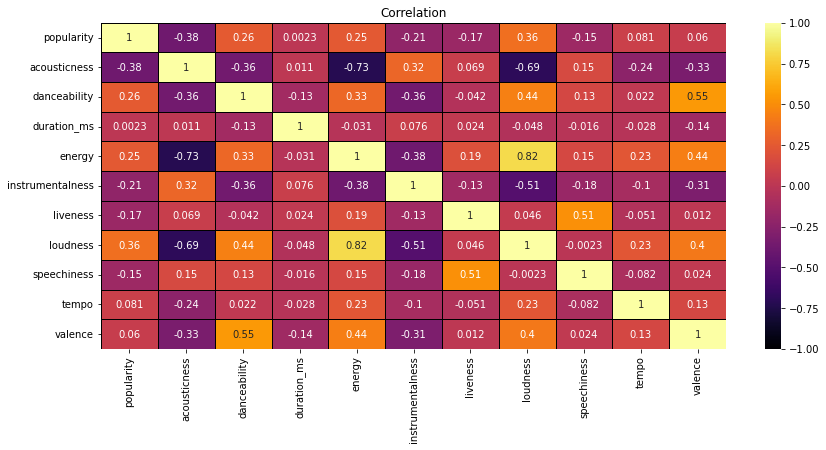

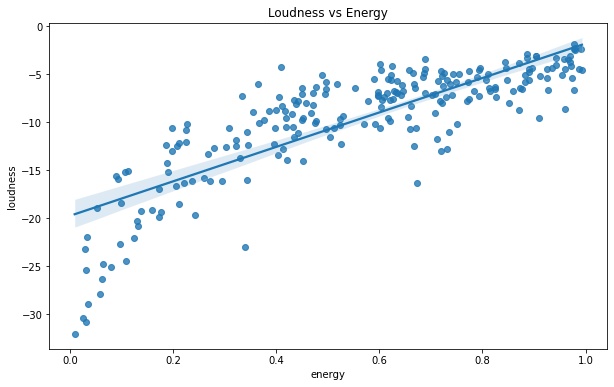

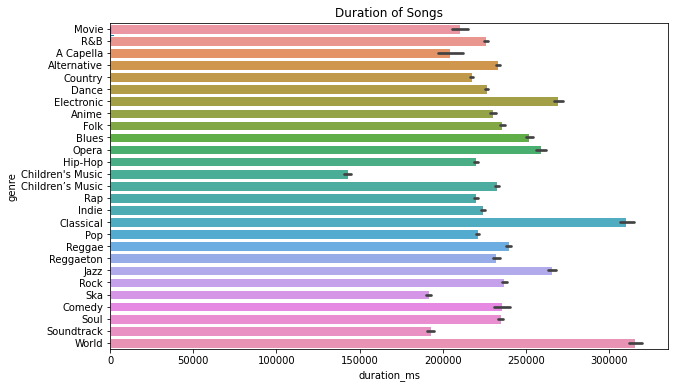

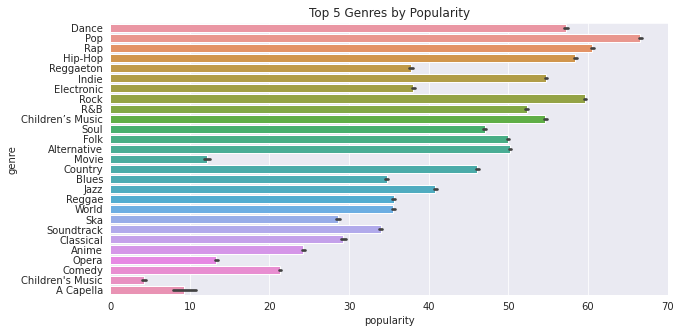

In [15]:
visualize(data)

### Cluster creation

In [16]:
def cluster(data):
    X = data.iloc[:, [5,8]].values
    
    wcss = []
    for i in range(1,11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)
    
    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title("Elbow graph")
    plt.show()
    
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0) 
    
    Y = kmeans.fit_predict(X)
    
    plt.figure(figsize=(10,6))
    plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='red', label="Cluster 1")
    plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='green', label="Cluster 2")
    plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label="Cluster 3")
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c="black", label='Centroids')
    plt.title("Clusters")

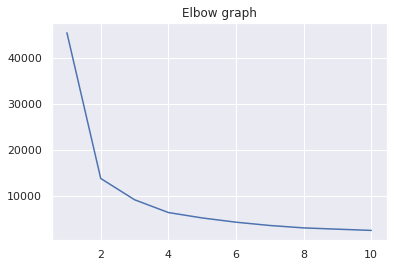

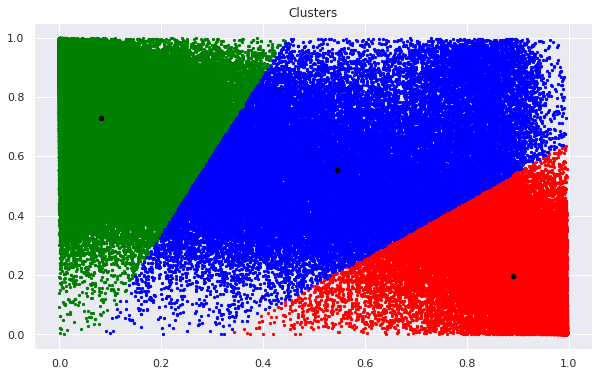

In [17]:
cluster(data)